<a href="https://colab.research.google.com/github/siri2511/Speech-Processing/blob/main/LowPassHighPassFiltering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-2-837574ab3036>:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wavfile.read(file_path)


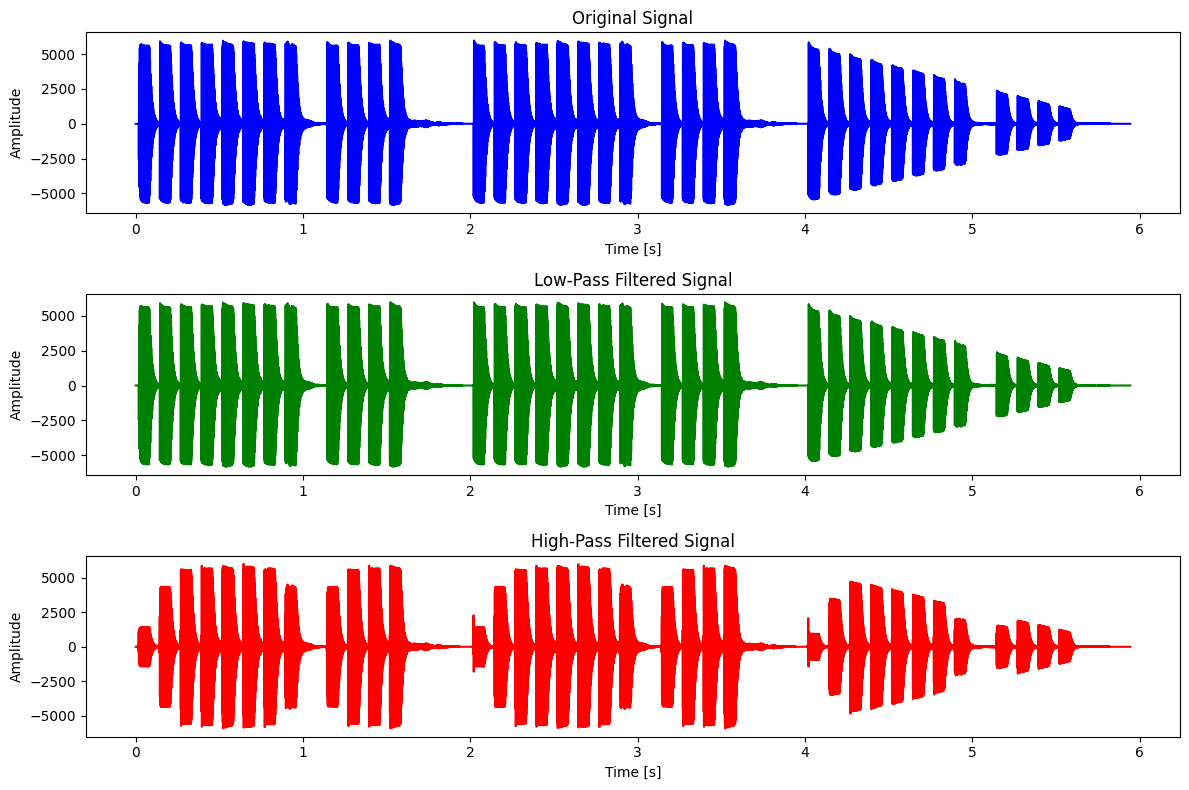

In [2]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Load a speech signal (WAV file)
def load_audio(file_path):
    sample_rate, data = wavfile.read(file_path)
    # Convert stereo to mono if needed
    if len(data.shape) == 2:
        data = np.mean(data, axis=1)
    return sample_rate, data

# Apply a low-pass filter
def low_pass_filter(data, sample_rate, cutoff_freq):
    nyquist = 0.5 * sample_rate
    normal_cutoff = cutoff_freq / nyquist
    b, a = signal.butter(4, normal_cutoff, btype='low', analog=False)
    filtered_data = signal.filtfilt(b, a, data)
    return filtered_data

# Apply a high-pass filter
def high_pass_filter(data, sample_rate, cutoff_freq):
    nyquist = 0.5 * sample_rate
    normal_cutoff = cutoff_freq / nyquist
    b, a = signal.butter(4, normal_cutoff, btype='high', analog=False)
    filtered_data = signal.filtfilt(b, a, data)
    return filtered_data


# Plot the signal and its filtered versions
def plot_signals(original, low_passed, high_passed, sample_rate):
    t = np.arange(len(original)) / sample_rate
    plt.figure(figsize=(12, 8))

    plt.subplot(3, 1, 1)
    plt.plot(t, original, color='blue')
    plt.title('Original Signal')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')

    plt.subplot(3, 1, 2)
    plt.plot(t, low_passed, color='green')
    plt.title('Low-Pass Filtered Signal')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')

    plt.subplot(3, 1, 3)
    plt.plot(t, high_passed, color='red')
    plt.title('High-Pass Filtered Signal')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')

    plt.tight_layout()
    plt.show()



# Main function
def main():
    # Load the audio file
    file_path = '/content/example_WAV.wav'  # Replace with your file path
    sample_rate, data = load_audio(file_path)

    # Define filter cutoff frequencies
    low_cutoff_freq = 3000  # Low-pass filter cutoff frequency (Hz)
    high_cutoff_freq = 300  # High-pass filter cutoff frequency (Hz)

    # Apply low-pass and high-pass filters
    low_passed = low_pass_filter(data, sample_rate, low_cutoff_freq)
    high_passed = high_pass_filter(data, sample_rate, high_cutoff_freq)

    # Plot the original and filtered signals
    plot_signals(data, low_passed, high_passed, sample_rate)




if __name__ == '__main__':
    main()
